In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer as DV

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

sns.set_style("whitegrid")

In [10]:
df = pd.read_csv("../data/external/dataset.csv")
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

## Data Cleaning
### Dropping unused columns
- CLIENTNUM is a unique identifier for each row and will not be used
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 & Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 are classifier columns derived either from the bank's internal team or from the original poster of the dataset

In [11]:
df = df.drop(["CLIENTNUM", 
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", 
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
             ], axis=1)
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

### Standardize strings
- Convert them to lower case
- Replace spaces with underscores
- Remove white spaces around the string
- Check for inconsistent spellings

In [12]:
# Convert them to lower case
df['Attrition_Flag'] = df['Attrition_Flag'].str.lower()
df['Gender'] = df['Gender'].str.lower()
df['Education_Level'] = df['Education_Level'].str.lower()
df['Marital_Status'] = df['Marital_Status'].str.lower()
df['Income_Category'] = df['Income_Category'].str.lower()
df['Card_Category'] = df['Card_Category'].str.lower()

# Replace spaces with underscores
df.replace('\s+', '_', regex=True, inplace=True)

# Trim white spaces around strings
df = df.applymap(lambda x: x.strip() if type(x)==str else x)

df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  existing_customer            45      m                3     high_school   
1  existing_customer            49      f                5        graduate   
2  existing_customer            51      m                3        graduate   
3  existing_customer            40      f                4     high_school   
4  existing_customer            40      m                3      uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        married     $60k_-_$80k          blue              39   
1         single  less_than_$40k          blue              44   
2        married    $80k_-_$120k          blue              36   
3        unknown  less_than_$40k          blue              34   
4        married     $60k_-_$80k          blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

### Null Values
There are no null values in this dataset

In [14]:
df.isnull().sum(axis=0)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Pairplot

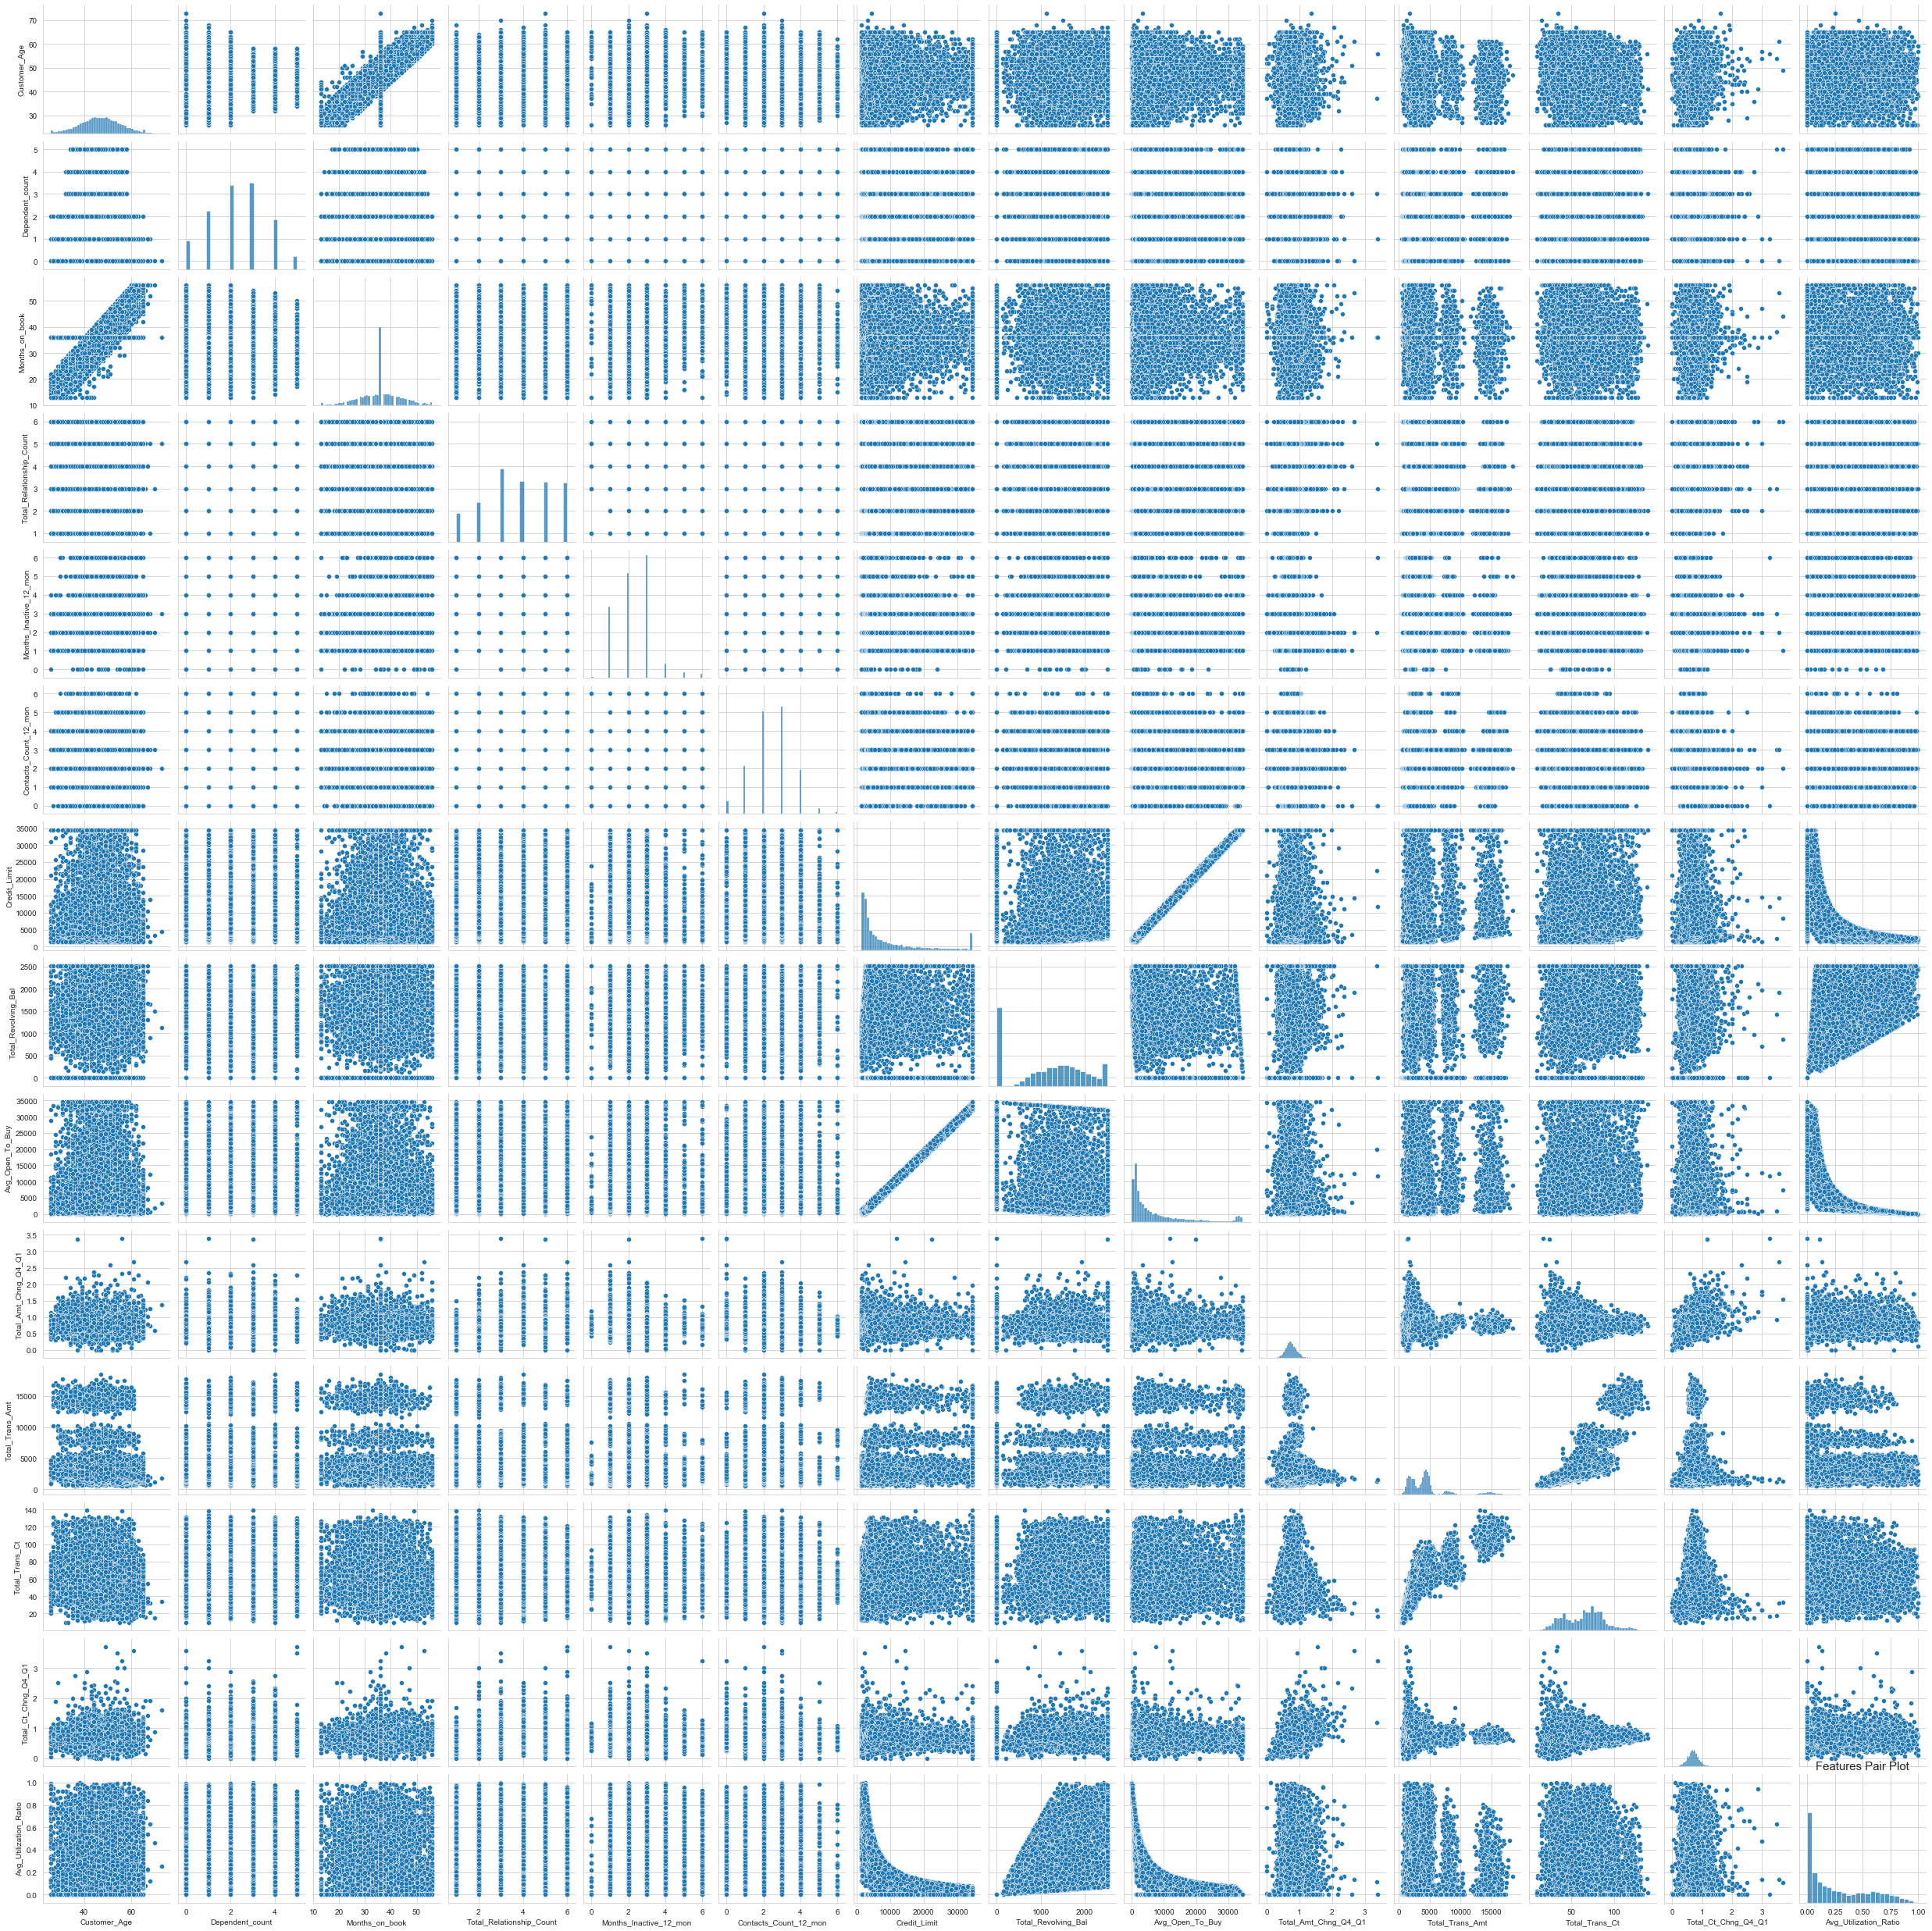

In [15]:
sns.pairplot(df)
plt.title('Features Pair Plot',fontsize=15);

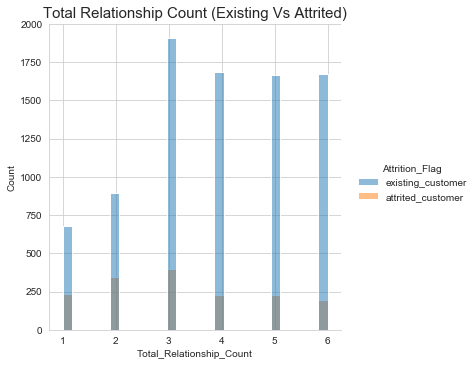

In [16]:
sns.displot(data=df, x='Total_Relationship_Count', hue='Attrition_Flag')
plt.title('Total Relationship Count (Existing Vs Attrited)',fontsize=15);

Existing customers tend to have more relationships than attrited customers

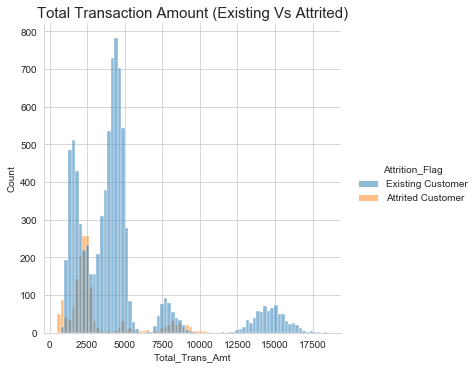

In [23]:
sns.displot(data=df, x='Total_Trans_Amt', hue='Attrition_Flag')
plt.title('Total Transaction Amount (Existing Vs Attrited)',fontsize=15);

Total transaction amount for attrited customers peaked at ~2500 vs existing at ~5000.

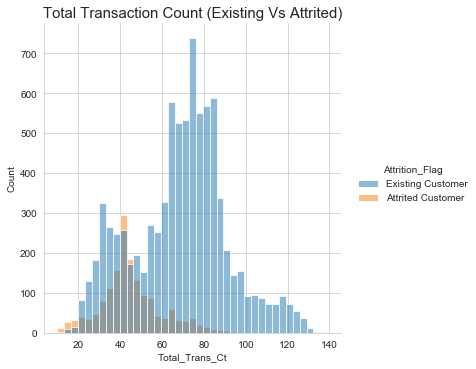

In [22]:
sns.displot(data=df, x='Total_Trans_Ct', hue='Attrition_Flag')
plt.title('Total Transaction Count (Existing Vs Attrited)',fontsize=15);

Total transaction count for attrited customers peaked at around 40 transactions, existing customers transaction count is double that peaking at around 80 transactions.

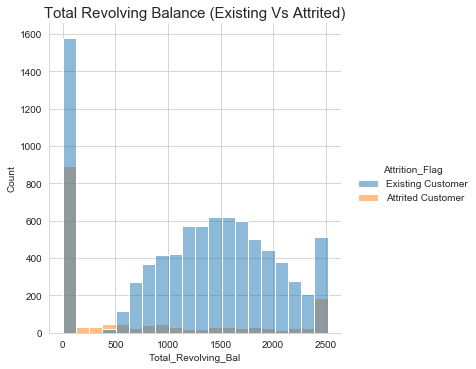

In [24]:
sns.displot(data=df, x='Total_Revolving_Bal', hue='Attrition_Flag')
plt.title('Total Revolving Balance (Existing Vs Attrited)',fontsize=15);

Majority of attrited customers do not utilize their credit cards, as shown above. They keep a total revolving balance near or at 0. Out of those that maintain a revolving balance, the majority have a revolving balance of around 2500.

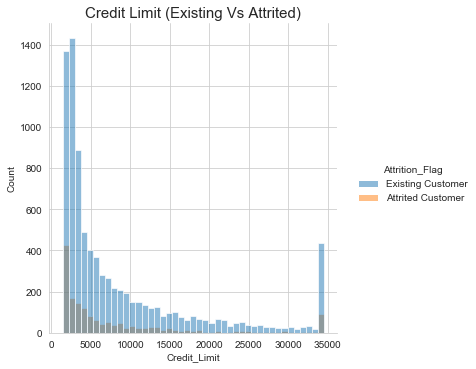

In [25]:
sns.displot(data=df, x='Credit_Limit', hue='Attrition_Flag')
plt.title('Credit Limit (Existing Vs Attrited)',fontsize=15);

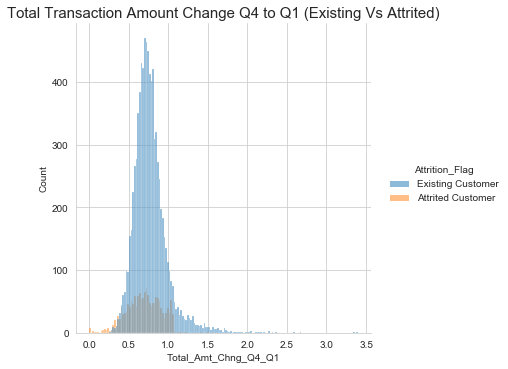

In [26]:
sns.displot(data=df, x='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag')
plt.title('Total Transaction Amount Change Q4 to Q1 (Existing Vs Attrited)',fontsize=15);

Transaction amount was much lower for attrited customers.

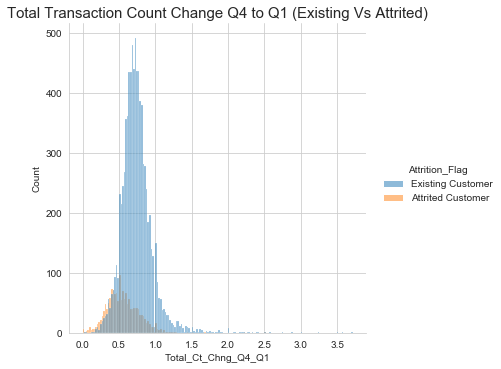

In [27]:
sns.displot(data=df, x='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag')
plt.title('Total Transaction Count Change Q4 to Q1 (Existing Vs Attrited)',fontsize=15);

Attrited customers had around 100 max transaction count between Q4 and Q1, while existing had max just over 400

In [64]:
df.replace(['Existing Customer','Attrited Customer'],[1,0],inplace=True)
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               1            45      M                3     High School   
1               1            49      F                5        Graduate   
2               1            51      M                3        Graduate   
3               1            40      F                4     High School   
4               1            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

## Imbalance in the Target Variable

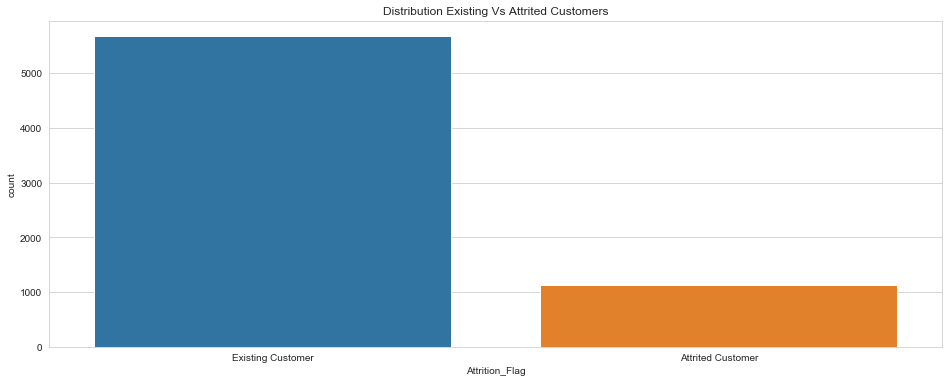

In [58]:
plt.figure(figsize=(16, 6))
plt.title("Distribution Existing Vs Attrited Customers")
sns.countplot(x=df_without_outliers['Attrition_Flag'])

Existing customers account for 83% (8500 records) of the data, while 17% (1627 records) is attrited customers. If we use this data ratio to train our model then the model will be biased towards existing customers.
To deal with this we will use an over sampling technique called SMOTE. Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The new instances are not just copies of existing rows, the algorithm takes samples of the feature space for each target class and its nearest neighbors. The algorithm then generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.
SMOTE is not guaranteed to produce more accurate models. We will try pipelining with different percentages, different feature sets, and different numbers of nearest neighbors to see how adding cases influences our model.

## One hot encoding for categorical variables - convert categorical to numeric

In [65]:
df_cc_encoded = pd.get_dummies(df)
df_cc_encoded.head()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0               1            45                3              39   
1               1            49                5              44   
2               1            51                3              36   
3               1            40                4              34   
4               1            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
0       12691.0                  777          11914.0  ...   
1        8256.0                  864           7392.0  ...   
2        3418.0                    0           3418.0  ...   
3        3313.0                 2517            796.0  ...   
4        4716.0                    0           4716.0  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 38 columns]

# Outliers

In [10]:
df.describe()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
count    10127.000000  10127.000000     10127.000000    10127.000000   
mean         0.839340     46.325960         2.346203       35.928409   
std          0.367235      8.016814         1.298908        7.986416   
min          0.000000     26.000000         0.000000       13.000000   
25%          1.000000     41.000000         1.000000       31.000000   
50%          1.000000     46.000000         2.000000       36.000000   
75%          1.000000     52.000000         3.000000       40.000000   
max          1.000000     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

Most columns have acceptable anomaly range, and there is no erroneous data captured such unnaturally high customer age. If you compare mean and median (50%) values, the larger the values the more likelihood of outliers in those features. For example, credit limit mean is \\$8631.95 while the median is $4549. This could indicate there are outliers due to wide discrepancy.
Avg_Open_To_Buy - could be the amount of credit available to use at a given time & Avg_Utilization_Ratio. This also has a wide discrepancy but that may be normal. We will plot to confirm.

### Interquartile Range (IQR) is a measure of statistical dispersion

IQR is the 1st quartile subtracted from the 3rd quartile.

In [61]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Customer_Age                  11.000
Dependent_count                2.000
Months_on_book                 9.000
Total_Relationship_Count       2.000
Months_Inactive_12_mon         1.000
Contacts_Count_12_mon          1.000
Credit_Limit                8512.500
Total_Revolving_Bal         1425.000
Avg_Open_To_Buy             8534.500
Total_Amt_Chng_Q4_Q1           0.228
Total_Trans_Amt             2585.500
Total_Trans_Ct                36.000
Total_Ct_Chng_Q4_Q1            0.236
Avg_Utilization_Ratio          0.480
dtype: float64


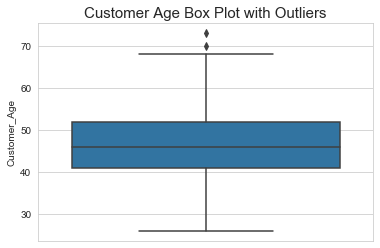

In [28]:
sns.boxplot(y='Customer_Age', hue='Attrition_Flag', data=df)
plt.title('Customer Age Box Plot with Outliers',fontsize=15);

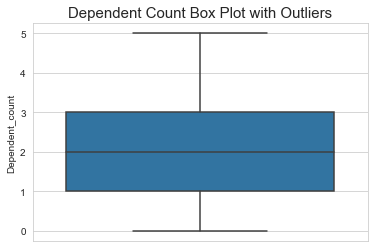

In [29]:
sns.boxplot(y='Dependent_count', hue='Attrition_Flag', data=df)
plt.title('Dependent Count Box Plot with Outliers',fontsize=15);

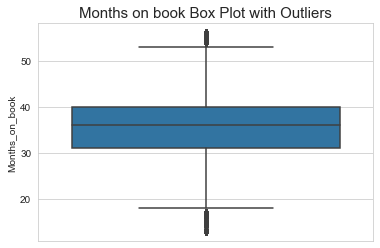

In [30]:
sns.boxplot(y='Months_on_book', hue='Attrition_Flag', data=df)
plt.title('Months on book Box Plot with Outliers',fontsize=15);

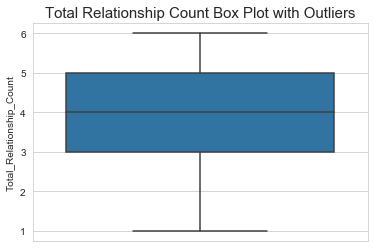

In [31]:
sns.boxplot(y='Total_Relationship_Count', hue='Attrition_Flag', data=df)
plt.title('Total Relationship Count Box Plot with Outliers',fontsize=15);

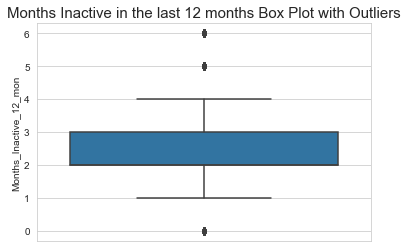

In [32]:
sns.boxplot(y='Months_Inactive_12_mon', hue='Attrition_Flag', data=df)
plt.title('Months Inactive in the last 12 months Box Plot with Outliers',fontsize=15);

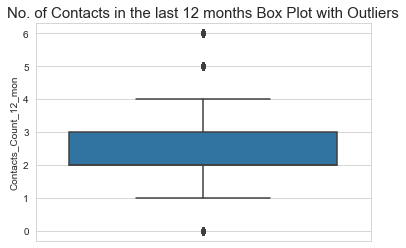

In [33]:
sns.boxplot(y='Contacts_Count_12_mon', hue='Attrition_Flag', data=df)
plt.title('No. of Contacts in the last 12 months Box Plot with Outliers',fontsize=15);

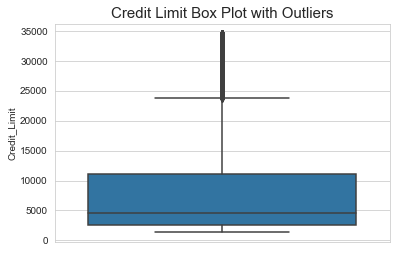

In [34]:
sns.boxplot(y='Credit_Limit', hue='Attrition_Flag', data=df)
plt.title('Credit Limit Box Plot with Outliers',fontsize=15);

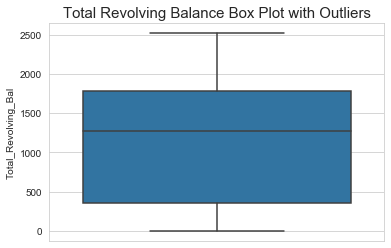

In [35]:
sns.boxplot(y='Total_Revolving_Bal', hue='Attrition_Flag', data=df)
plt.title('Total Revolving Balance Box Plot with Outliers',fontsize=15);

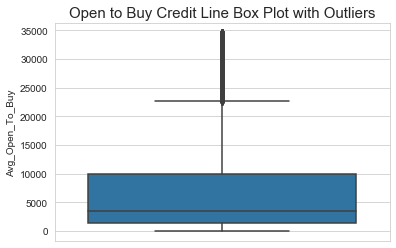

In [36]:
sns.boxplot(y='Avg_Open_To_Buy', hue='Attrition_Flag', data=df)
plt.title('Open to Buy Credit Line Box Plot with Outliers',fontsize=15);

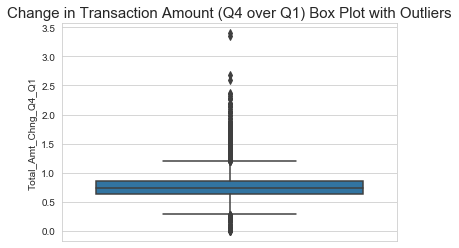

In [37]:
sns.boxplot(y='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', data=df)
plt.title('Change in Transaction Amount (Q4 over Q1) Box Plot with Outliers',fontsize=15);

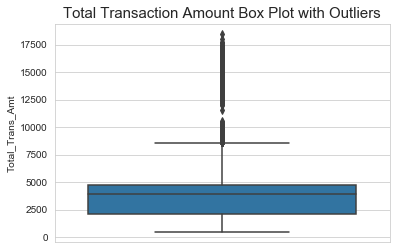

In [38]:
sns.boxplot(y='Total_Trans_Amt', hue='Attrition_Flag', data=df)
plt.title('Total Transaction Amount Box Plot with Outliers',fontsize=15);

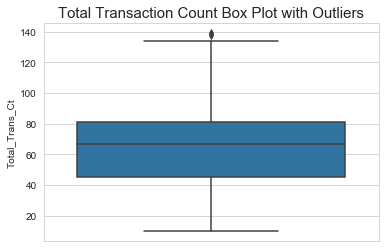

In [39]:
sns.boxplot(y='Total_Trans_Ct', hue='Attrition_Flag', data=df)
plt.title('Total Transaction Count Box Plot with Outliers',fontsize=15);

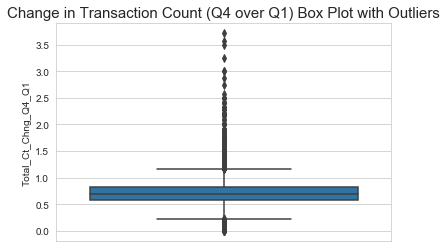

In [40]:
sns.boxplot(y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', data=df)
plt.title('Change in Transaction Count (Q4 over Q1) Box Plot with Outliers',fontsize=15);

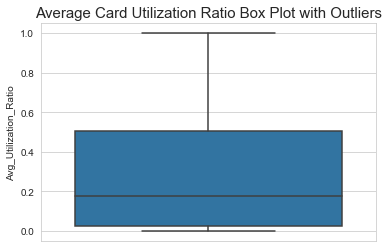

In [41]:
sns.boxplot(y='Avg_Utilization_Ratio', hue='Attrition_Flag', data=df)
plt.title('Average Card Utilization Ratio Box Plot with Outliers',fontsize=15);

### Correcting and Removing Outliers

In [71]:
df_without_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_without_outliers.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
10               1            42      M                5      Uneducated   
14               1            57      F                2        Graduate   
19               1            45      F                2        Graduate   
21               0            62      F                0        Graduate   
23               1            47      F                4         Unknown   

   Marital_Status Income_Category Card_Category  Months_on_book  \
10        Unknown         $120K +          Blue              31   
14        Married  Less than $40K          Blue              48   
19        Married         Unknown          Blue              37   
21        Married  Less than $40K          Blue              49   
23         Single  Less than $40K          Blue              36   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10                         5                       3                      2   
14                         5                       2                      2   
19                         6                       1                      2   
21                         2                       3                      3   
23                         3                       3                      2   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
10        6748.0                 1467           5281.0                 0.831   
14        2436.0                  680           1756.0                 1.190   
19       14470.0                 1157          13313.0                 0.966   
21        1438.3                    0           1438.3                 1.047   
23        2492.0                 1560            932.0                 0.573   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
10             1201              42                0.680   
14             1570              29                0.611   
19             1207              21                0.909   
21              692              16                0.600   
23             1126              23                0.353   

    Avg_Utilization_Ratio  
10                  0.217  
14                  0.279  
19                  0.080  
21                  0.000  
23                  0.626

In [73]:
df_without_outliers.shape

(6802, 20)

## Balancing Target using SMOTE

In [66]:
# Divide our dataset into feature and target set
x = df_cc_encoded.drop('Attrition_Flag',axis=1) # Feature set
x.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777          11914.0                 1.335  ...   
1                  864           7392.0                 1.541  ...   
2                    0           3418.0                 2.594  ...   
3                 2517            796.0                 1.405  ...   
4                    0           4716.0                 2.175  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 37 columns]

In [67]:
y = df_cc_encoded['Attrition_Flag'] # Target set
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int64

In [68]:
smote = SMOTE(random_state=60)
x_smote, y_smote = smote.fit_resample(x,y)

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


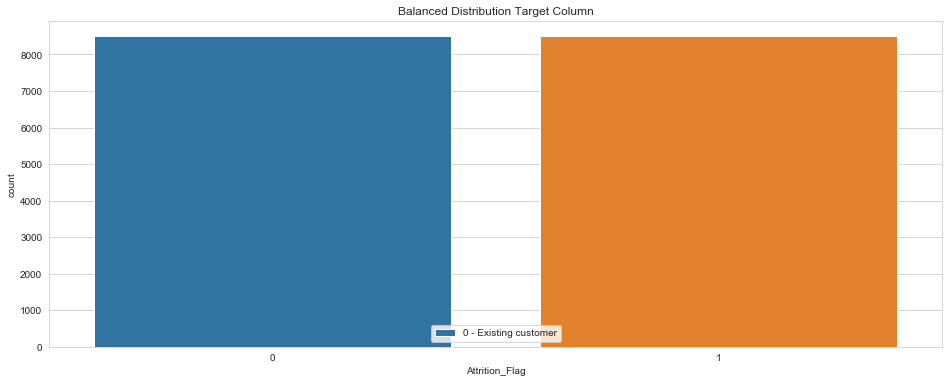

In [69]:
plt.figure(figsize=(16, 6))
plt.title("Balanced Distribution Target Column")
sns.countplot(y_smote)
plt.legend(['0 - Existing customer', '1 - Attrited customer'], loc='lower center', ncol=2)

After oversampling with SMOTE, the data is now balanced and we can proceed to training the model.

### Test/Train Split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Logistic Regression

In [33]:
c = LogisticRegression(max_iter=1000)
logistic.fit(x_train, y_train)
prediction_lr = logistic.predict(x_test)
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.72      0.49      0.58       384
           1       0.91      0.97      0.94      2148

    accuracy                           0.89      2532
   macro avg       0.82      0.73      0.76      2532
weighted avg       0.88      0.89      0.88      2532



In [39]:
logistic.score(x_train, y_train)

0.8911125740618828

The Logistic Regression model classifies the data with 89% precision

## Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB

nbmodel = MultinomialNB().fit(x_train, y_train)
nbpredictions=nbmodel.predict(x_test)

print(classification_report(y_test,nbpredictions))

              precision    recall  f1-score   support

           0       0.20      0.41      0.27       384
           1       0.87      0.71      0.78      2148

    accuracy                           0.67      2532
   macro avg       0.54      0.56      0.53      2532
weighted avg       0.77      0.67      0.71      2532



The Naive Bayes model classifies the data with 67% precision

## Feature Importance

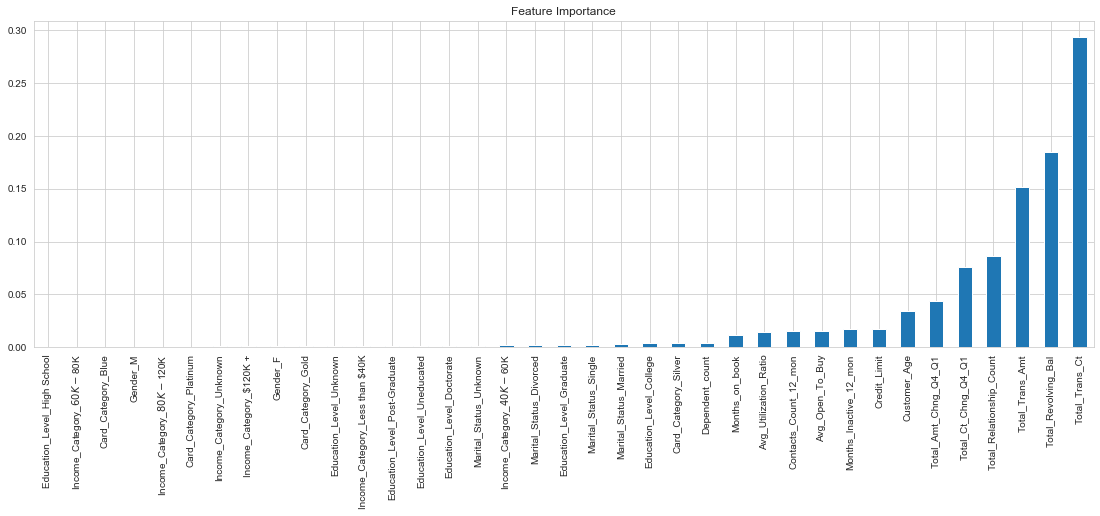

In [35]:
clf = DecisionTreeClassifier()
clf.fit(x, y)
plt.title("Feature Importance")
pd.Series(clf.feature_importances_, index=x.columns[:]).sort_values().plot.bar(figsize=(19, 6))

## Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
matrix1 = confusion_matrix(prediction_lr, y_test)

In [76]:
from sklearn.metrics import accuracy_score, recall_score, roc_curve, roc_auc_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

param_grid={'C':np.linspace(0.1,10,20)}
cv=5

estimator=LogisticRegression(penalty='l1',class_weight='balanced',fit_intercept=True,max_iter=100,solver='liblinear')
grid_balanced=GridSearchCV(estimator,param_grid,cv=cv)
grid_balanced.fit(x_train,y_train)
grid_balanced.best_estimator_
grid_balanced.best_estimator_.coef_
y_pred=grid_balanced.best_estimator_.predict(x_test)
confusion_matrix(y_test,y_pred)

C:\Users\david\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\david\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\david\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[ 323,   61],
       [ 324, 1824]], dtype=int64)

The classifier predicted 1885 existing customers, and 647 attrited customers. In the sample there were 2148 existing customers and 384 attrited customers.

### Accuracy: How often was the classifier correct?
(TP+TN)/total = (1824 + 323)/2532 = 0.84

### Misclassification Rate: How often is the classifier wrong?
(FP+FN)/total = (61 + 324)/2532 = 0.15

### True Positive Rate: When it's actually yes, how often does it predict yes?
TP/actual yes = 1824/2148 = 0.84

## False Positive Rate: When it's actually no, how often does it predict yes?
FP/actual no = 61/384 = 0.15

## True Negative Rate: When it's actually no, how often does it predict no?
TN/actual no = 323/384 = 0.84

## Precision: When it predicts yes, how often is it correct?
TP/predicted yes = 1824/1885 = 0.96

## Prevalence: How often does the yes condition actually occur in our sample?
actual yes/total = 2148/2532 = 0.84